# T test

T-통계량(T-statistic)은 다음과 같은 수식으로 표현됩니다:

$ T = \frac{{\text{표본 평균} - \text{모집단 평균}}}{{\text{표준 오차}}} $

여기서 각 항목은 다음과 같이 설명됩니다:

- **표본 평균 (Sample Mean)**: 분석하려는 표본 데이터 집합의 평균 값입니다.

- **모집단 평균 (Population Mean)**: 모집단에서 전체 모집단의 평균 값으로 가정되는 값입니다. 통계 검정의 귀무 가설에서 제시됩니다.

- **표준 오차 (Standard Error)**: 표본 평균의 표준 편차(표본 표준 편차)를 표본 크기의 제곱근으로 나눈 값으로, 표본 평균의 표준 오차를 나타냅니다.



위의 수식에서 알 수 있는것
- 1. 간단한 아이디어다. 오차보다 작은 차이인지 큰 차이인지를 확인하는 단순한 식
- 2. 이를 검증할 떈 정규분포가 필요할 것이다

# 실습

| Column          | Description(US)                                   | KR                  |
|-----------------|---------------------------------------------------|---------------------|
| Sex             | male, female                                      | 성별                |
| Age             | round up to 5 years                              | 나이                |
| Height          | round up to 5 cm [cm]                            | 키                  |
| Weight          | [kg]                                              | 몸무게              |
| Sight_left      | eyesight (left)                                  | 시력(좌)            |
| Sight_right     | eyesight (right)                                 | 시력(우)            |
| Hear_left       | hearing left, 1 (normal), 2 (abnormal)           | 청력                |
| Hear_right      | hearing right, 1 (normal), 2 (abnormal)          | 청력                |
| SBP             | Systolic blood pressure [mmHg]                   | 수축기 혈압         |
| DBP             | Diastolic blood pressure [mmHg]                  | 이완기 혈압         |
| BLDS            | BLDS or FSG (fasting blood glucose) [mg/dL]      | 공복혈당            |
| Tot_chole       | total cholesterol [mg/dL]                        | 총 콜레스테롤       |
| HDL_chole       | HDL cholesterol [mg/dL]                         | HDL 콜레스테롤     |
| LDL_chole       | LDL cholesterol [mg/dL]                         | LDL 콜레스테롤     |
| Triglyceride    | triglyceride [mg/dL]                            | 중성지방            |
| Hemoglobin      | hemoglobin [g/dL]                                | 헤모글로빈          |
| Urine_protein   | protein in urine, 1 (-), 2 (+/-), 3 (+1), 4 (+2), 5 (+3), 6 (+4) | 요단백 또는 단백뇨 |
| Serum_creatinine| serum (blood) creatinine [mg/dL]                 | 혈청 크레아티닌     |
| SGOT_AST        | SGOT (Glutamate-oxaloacetate transaminase) AST (Aspartate transaminase) [IU/L] | 혈청지오티 AST |
| SGOT_ALT        | ALT (Alanine transaminase) [IU/L]                | 혈청지오티 ALT     |
| Gamma_GTP       | γ-glutamyl transpeptidase [IU/L]                | 감마지티피          |
| SMK_stat_type_cd| Smoking state, 1 (never), 2 (used to smoke but quit), 3 (still smoke) | 흡연상태 |
| DRK_YN          | Drinker or Not                                   | 음주여부            |


In [1]:
import pandas as pd
import pca
import numpy as np
D=pd.read_csv("C:/Users/SAMSUNG/Desktop/공부파일들/excel/kaggle/smoking_driking_dataset_Ver01.csv")
data=pd.DataFrame(D)

## 데이터 살펴보기

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

우선 위의 정보를 보아 Nan값은 없음

## T-test

In [3]:
data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


### T-test 1_samp

단일표본 T test는 무엇이냐?         
위의 데이터를 볼때 age의 평균이 47이라고 보인다.

### 설명을 위한 표본 추출
> 위의 데이터를 모집단으로 가정하고 진행하며, 따라서 모수를 아는 상황이라고 생각할 수 있다

- 위와 같은 가정은 현실적이지 않지만, 구조를 이해하기 쉬우며, 현실적으론 모수의 신뢰구간을 추정하는 것이 현실적임

In [4]:
# 표본
import sklearn.preprocessing as skpre
import sklearn.model_selection as skmod

In [5]:
sample_dict={}
for i in range(1,4):
    sample_dict[i],_=skmod.train_test_split(data,train_size=50,random_state=i)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

### 시각화로 살펴보자

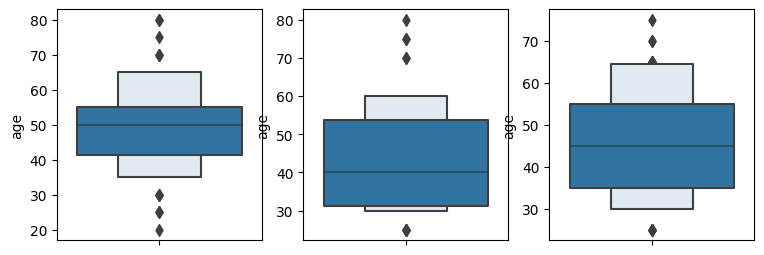

In [7]:
_,a=plt.subplots(1,3,figsize=(9,3))
for i in range(1,4):
    sb.boxenplot(y=sample_dict[i]["age"],ax=a[i-1])

이상치는 존재하지만 중앙값이 40~50 근방에 존재함을 보인다

- T-test를 수행하기 위해선 표본 데이터의 정규성이 필요하다

In [8]:
sample_dict[1]["age"].describe()

count    50.000000
mean     49.500000
std      13.785899
min      20.000000
25%      41.250000
50%      50.000000
75%      55.000000
max      80.000000
Name: age, dtype: float64

#### 정규성을 확인하는 여러가지 방법

- 1. QQ plot

In [9]:
import scipy.stats as sps

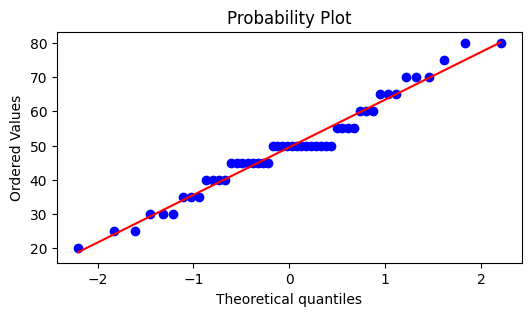

In [10]:
plt.figure(figsize=(6,3))
sps.probplot(sample_dict[1]["age"],dist='norm',plot=plt)
plt.show()

- 2. 정규성 테스트

In [11]:
sps.shapiro(sample_dict[1]["age"])

ShapiroResult(statistic=0.9687645435333252, pvalue=0.20606505870819092)

위의 결과를 볼때, 정규분포를 따른다고 생각할 수 있다

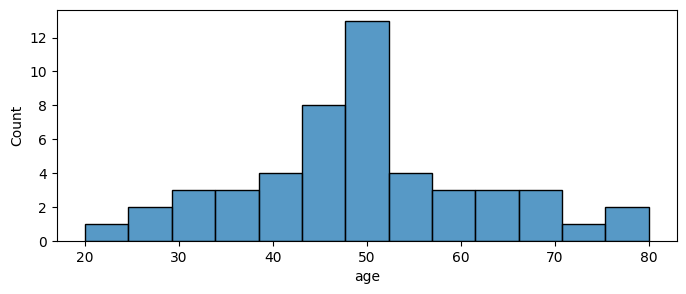

In [12]:
plt.figure(figsize=(8,3))
sb.histplot(sample_dict[1]["age"],bins=13)
plt.show()

### 단일 표본 T-test
> 물론 표본의 수가 30을 넘어가므로 Z-test를 해도 괜찮다         
> 어차피 n이 클수록 t분포는 z분포와 비슷해지므로 큰 상관이 없다

In [13]:
sps.ttest_1samp(sample_dict[1]["age"],47)

TtestResult(statistic=1.2823007845327954, pvalue=0.20577064353344188, df=49)

- 시각자료(pvalue)
https://westshine-data-analysis.tistory.com/133

위의 해석은 다음과 같다.
- 1. T_statistic 값이 다음 1.28보다 크거나 작은 값의 존재 확률이 20%(각각 10%)[pvalue의 해석]이다.
- 2. T_statistic값이 위의 검증값보다 크거나 작다는 것은 모집단의 평균이 47보다 작거나 크다는 것이다.

### 신뢰구간을 구해보자 (유의수준 5%)

In [14]:
import numpy as np

In [21]:
interval=sps.t.interval(0.95,len(sample_dict[1])-1,loc=np.mean(sample_dict[1]["age"]),scale=sps.sem(sample_dict[1]["age"]))

In [22]:
interval

(45.58209076464576, 53.41790923535424)

#### 해석
- 1. 유의수준 5%에서 추정한 모수의 구간은 위와 같다

### 시각화

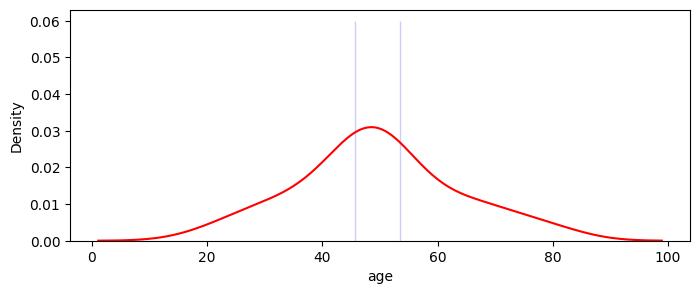

In [28]:
plt.figure(figsize=(8,3))
sb.kdeplot(data=sample_dict[1]["age"],color="Red")
sb.lineplot(x=[interval[0],interval[0]],y=[0,0.06],color="Blue")
sb.lineplot(x=[interval[1],interval[1]],y=[0,0.06],color="Blue")
plt.show()


위의 그림을 해석하는데 굉장히 주의해야한다.         
왜냐하면 모수의 신뢰구간이므로, 마치 표본에서 저 부분이 중요해보이는 그래프로 오해받기 쉽다.            
오히려 반대로, 중심극한정리에 의해 해당 표본의 평균은 정규분포를 따를것이며, 헤딩사실로 모수는 저 구간사이에 존재할 것이라고 생각하는 것이다